In [5]:
!pip install openpyxl
!pip install swat
!pip install seaborn
!pip install time
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download es_core_news_sm

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


2021-12-12 11:42:41.845265: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-12 11:42:41.849024: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [6]:
file_name =r'Ordenes de compra PORTAL 1K (datos completo).xlsx'
sheet =  'Datos estudio'

import pandas as pd
data_pro = pd.read_excel(io=file_name, sheet_name=sheet)

data_pro.head(5)

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,...,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,# 49561,# 2582,2021-11-10,2021-11-10,2021-11-10,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,...,NaN,23.364,27.803,4.439,46.728,55.606,2021-11-10,NaN,NaN,NaN
1,# 49560,# 2581,2021-11-10,2021-11-11,2021-11-10,Mercadeo y publicidad,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,...,1.0,1.476.972,1.757.597,280.625,1.476.972,1.757.597,2021-11-10,NaN,NaN,NaN
2,# 49559,# 2580,2021-11-10,2021-11-10,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Usuario solicitante 3,Usuario Aprobador 3,...,NaN,15.500,15.500,0,155.000,155.000,2021-11-10,NaN,NaN,NaN
3,# 49558,# 1892,2021-11-10,2021-11-12,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,...,NaN,22.000,22.000,0,1.100.000,1.100.000,2021-11-10,NaN,NaN,NaN
4,# 49557,# 1,2021-11-10,2021-11-09,2021-11-10,Imprenta y litografía,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,...,7.0,92.084,109.580,17.496,644.588,767.060,2021-11-10,NaN,NaN,NaN


In [7]:
data_pro.columns

Index(['NÚMERO PEDIDO', 'ORDEN NÚMERO', 'FECHA ORDEN', 'FECHA ENTREGA',
       'FECHA APROBACION', 'CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'USUARIO',
       'USUARIO APROBADOR', 'DIRECCION PEDIDO', 'DIRECCION FACTURACION',
       'CENTRO DE COSTOS', 'PRESUPUESTO', 'PORTAL', 'ESTADO',
       'PRODUCTO O SERVICIO', 'CODIGO PORTAL', 'CANTIDAD PEDIDA',
       'CANTIDAD RECIBIDA', 'PRECIO UNITARIO', 'PRECIO UNITARIO + IVA', 'IVA',
       'TOTAL SIN IVA', 'TOTAL + IVA', 'FECHA ULTIMO MOVIMIENTO',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

<AxesSubplot:xlabel='CATEGORÍA'>

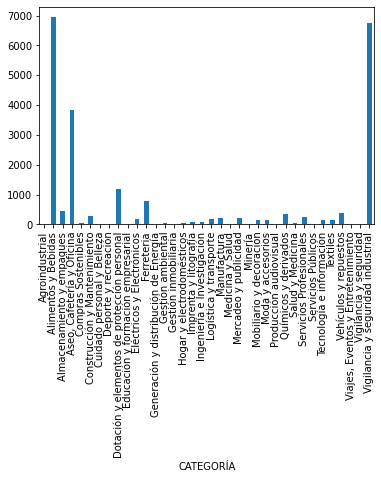

In [8]:
data_pro.groupby(['CATEGORÍA']).size().plot(kind="bar")

<AxesSubplot:xlabel='ESTADO'>

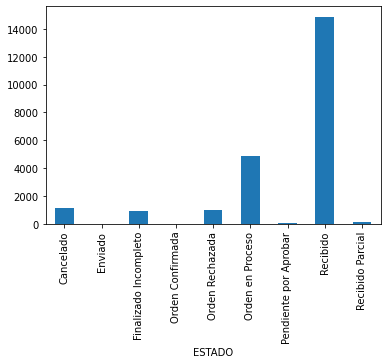

In [9]:
data_pro.groupby(['ESTADO']).size().plot(kind="bar")

<AxesSubplot:xlabel='SUBCATEGORIA'>

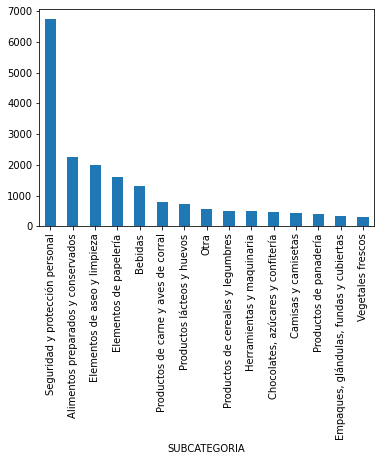

In [10]:
data_pro.groupby(['SUBCATEGORIA']).size().sort_values(ascending=False)[:15].plot(kind="bar")

<AxesSubplot:xlabel='PROVEEDOR'>

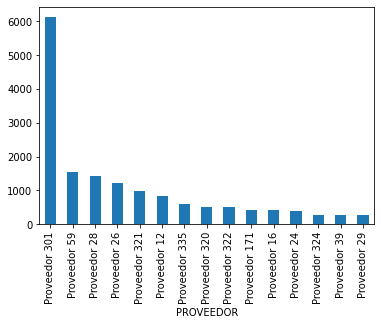

In [11]:
data_pro.groupby(['PROVEEDOR']).size().sort_values(ascending=False)[:15].plot(kind="bar")

<AxesSubplot:xlabel='USUARIO'>

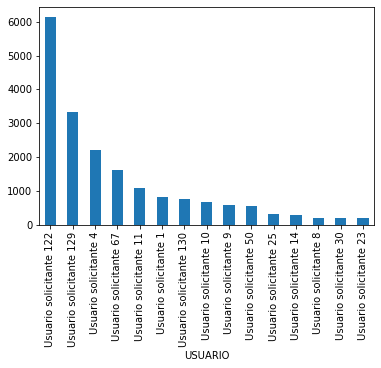

In [12]:
data_pro.groupby(['USUARIO']).size().sort_values(ascending=False)[:15].plot(kind="bar")

In [13]:
data_pro.groupby(['SUBCATEGORIA']).size().sort_values(ascending=False)[:10]

SUBCATEGORIA
Seguridad y protección personal        6733
Alimentos preparados y conservados     2243
Elementos de aseo y limpieza           1997
Elementos de papelería                 1618
Bebidas                                1328
Productos de carne y aves de corral     787
Productos lácteos y huevos              720
Otra                                    572
Productos de cereales y legumbres       497
Herramientas y maquinaria               489
dtype: int64

In [14]:
#Stop words
#importing stop words from English language.
import spacy
import spacy.lang.es
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS

#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

#Printing first ten stop words:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])

Number of stop words: 551
First ten stop words: ['intenta', 'según', 'señaló', 'verdadera', 'cuántos', 'alguno', 'sabe', 'hoy', 'usais', 'antes', 'días', 'mío', 'pasado', 'toda', 'he', 'arriba', 'mencionó', 'ejemplo', 'ultimo', 'aquello']


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [16]:
data_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23083 entries, 0 to 23082
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NÚMERO PEDIDO            23083 non-null  object 
 1   ORDEN NÚMERO             23083 non-null  object 
 2   FECHA ORDEN              23083 non-null  object 
 3   FECHA ENTREGA            18770 non-null  object 
 4   FECHA APROBACION         21950 non-null  object 
 5   CATEGORÍA                23083 non-null  object 
 6   SUBCATEGORIA             23083 non-null  object 
 7   PROVEEDOR                23083 non-null  object 
 8   USUARIO                  23083 non-null  object 
 9   USUARIO APROBADOR        21950 non-null  object 
 10  DIRECCION PEDIDO         23083 non-null  object 
 11  DIRECCION FACTURACION    10828 non-null  object 
 12  CENTRO DE COSTOS         16672 non-null  object 
 13  PRESUPUESTO              18581 non-null  object 
 14  PORTAL                

In [17]:
count_sub=data_pro.SUBCATEGORIA.value_counts()


In [18]:
count_sub

Seguridad y protección personal                    6733
Alimentos preparados y conservados                 2243
Elementos de aseo y limpieza                       1997
Elementos de papelería                             1618
Bebidas                                            1328
                                                   ... 
Calefacción, ventilación y circulación del aire       1
Medios impresos                                       1
Almacenaje                                            1
Generación de energía                                 1
Rodamientos, cojinetes ruedas y engranajes            1
Name: SUBCATEGORIA, Length: 149, dtype: int64

In [19]:
data_pro=data_pro.merge(right=count_sub, how="left", left_on="SUBCATEGORIA", right_index=True)

In [20]:
data_pro[['SUBCATEGORIA_x']][data_pro['SUBCATEGORIA_y']>500].value_counts()

SUBCATEGORIA_x                     
Seguridad y protección personal        6733
Alimentos preparados y conservados     2243
Elementos de aseo y limpieza           1997
Elementos de papelería                 1618
Bebidas                                1328
Productos de carne y aves de corral     787
Productos lácteos y huevos              720
Otra                                    572
dtype: int64

In [21]:
data_pro2=data_pro[data_pro['SUBCATEGORIA_y']>500]

In [22]:
data_pro2

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA_x,PROVEEDOR,USUARIO,USUARIO APROBADOR,...,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO,Unnamed: 26,Unnamed: 27,Unnamed: 28,SUBCATEGORIA_y
2,# 49559,# 2580,2021-11-10,2021-11-10,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Usuario solicitante 3,Usuario Aprobador 3,...,15.500,15.500,0,155.000,155.000,2021-11-10,NaN,NaN,NaN,2243
3,# 49558,# 1892,2021-11-10,2021-11-12,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,...,22.000,22.000,0,1.100.000,1.100.000,2021-11-10,NaN,NaN,NaN,787
4,# 49557,# 1,2021-11-10,2021-11-09,2021-11-10,Imprenta y litografía,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,...,92.084,109.580,17.496,644.588,767.060,2021-11-10,NaN,NaN,NaN,572
18,# 49545,# 1891,2021-11-09,2021-11-10,2021-11-09,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 11,Usuario solicitante 4,Usuario Aprobador 4,...,24.980,24.980,0,2.498.000,2.498.000,2021-11-09,NaN,NaN,NaN,787
22,# 49541,# 1890,2021-11-09,2021-11-10,2021-11-09,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,...,20.500,20.500,0,1.025.000,1.025.000,2021-11-09,NaN,NaN,NaN,787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23076,# 3,# 3,2018-05-01,NaN,2018-05-01,Vigilancia y seguridad industrial,Seguridad y protección personal,Proveedor 229,Usuario solicitante 131,Usuario Aprobador 70,...,84,100,16,252,300,2018-05-01,NaN,NaN,NaN,6733
23077,# 2,# 2,2018-04-30,NaN,2018-05-01,Vigilancia y seguridad industrial,Seguridad y protección personal,Proveedor 229,Usuario solicitante 131,Usuario Aprobador 70,...,84,100,16,84,100,2018-05-01,NaN,NaN,NaN,6733
23078,# 2,# 2,2018-04-30,NaN,2018-05-01,"Aseo, Cafetería y Oficina",Elementos de papelería,Proveedor 229,Usuario solicitante 131,Usuario Aprobador 70,...,33.613,40.000,6.387,268.908,320.000,2018-05-01,NaN,NaN,NaN,1618
23079,# 2,# 2,2018-04-30,NaN,2018-05-01,"Aseo, Cafetería y Oficina",Elementos de papelería,Proveedor 229,Usuario solicitante 131,Usuario Aprobador 70,...,588,700,112,588,700,2018-05-01,NaN,NaN,NaN,1618


In [23]:
# Load English tokenizer, tagger, parser, NER and word vectors
import string

parser =spacy.load("es_core_news_sm")
punctuations = string.punctuation


# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [24]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [25]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))


In [26]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)


In [27]:
from sklearn.model_selection import train_test_split

X = data_pro2['PRODUCTO O SERVICIO'] # the features we want to analyze
ylabels = data_pro2.SUBCATEGORIA_x # the labels, or answers, we want to test against


X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [28]:
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.linear_model import LogisticRegression
stop_words = spacy.lang.es.stop_words.STOP_WORDS

classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector)])

# model generation
pipe.fit(X_train.values.ravel())

C:\Users\KeyssiArroyo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x0000026A6526D670>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x0000026A5F4F7F70>))])

In [29]:
X_train=pipe.transform(X_train.values.ravel())
X_test=pipe.transform(X_test.values.ravel())
X_train=X_train.toarray()
X_test=X_test.toarray()

In [30]:
len(X_train)

11198

In [32]:
from imblearn.over_sampling import SMOTE
x_train = pd.DataFrame(X_train, columns=X_train.tolist())
X_resample, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resampled, test_size = 0.25, random_state = 42)


In [34]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [35]:
from sklearn import metrics
# Predicting with a test dataset
predicted = classifier.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted, average='micro'))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted, average='micro' ))

Logistic Regression Accuracy: 0.9808310130648962
Logistic Regression Precision: 0.9808310130648962
Logistic Regression Recall: 0.9808310130648962


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))


                                     precision    recall  f1-score   support

 Alimentos preparados y conservados       1.00      0.97      0.98      1125
                            Bebidas       1.00      0.99      1.00      1159
       Elementos de aseo y limpieza       0.99      0.96      0.98      1179
             Elementos de papelería       1.00      0.95      0.97      1185
                               Otra       0.89      0.99      0.94      1128
Productos de carne y aves de corral       1.00      0.99      1.00      1174
         Productos lácteos y huevos       0.98      1.00      0.99      1191
    Seguridad y protección personal       1.00      1.00      1.00      1197

                           accuracy                           0.98      9338
                          macro avg       0.98      0.98      0.98      9338
                       weighted avg       0.98      0.98      0.98      9338



In [37]:
import numpy as np
results = pd.DataFrame(data={'predicted': predicted, 'actual': y_test})
results['result'] = np.where(results['predicted']==results['actual'], 1, 0)
results.sort_values(by='result').head(20)

,predicted,actual,result
22624,Otra,Elementos de papelería,0
35173,Otra,Productos lácteos y huevos,0
24384,Otra,Elementos de papelería,0
23436,Otra,Elementos de papelería,0
1731,Productos lácteos y huevos,Alimentos preparados y conservados,0
12155,Otra,Alimentos preparados y conservados,0
22584,Otra,Elementos de papelería,0
22379,Otra,Elementos de papelería,0
34053,Otra,Productos lácteos y huevos,0
22134,Otra,Elementos de papelería,0


In [38]:
results.groupby(['result']).size()

result
0     179
1    9159
dtype: int64

In [39]:
accuracy_test=round((results.groupby(['result']).size()[1]/(results.groupby(['result']).size()[0]+results.groupby(['result']).size()[1]))*100,2)
print(f'the predicted is {accuracy_test} %')
print(f'NO predicted is {round(100-accuracy_test,2)} %')


the predicted is 98.08 %
NO predicted is 1.92 %


In [40]:
results.join(data_pro2['PRODUCTO O SERVICIO']).sort_values(by='result').tail(40)

,predicted,actual,result,PRODUCTO O SERVICIO
13019,Alimentos preparados y conservados,Alimentos preparados y conservados,1,74 Protector auditivo tipo copa
22227,Elementos de papelería,Elementos de papelería,1,LR_SKS_LaEspecial_Mezcla de Maní con Pasas 50gr
12560,Alimentos preparados y conservados,Alimentos preparados y conservados,1,6 Bota de seguridad media caña dielectrica con...
5100,Seguridad y protección personal,Seguridad y protección personal,1,NaN
17018,Bebidas,Bebidas,1,33 Guantes anticorte nivel 3
24564,Elementos de papelería,Elementos de papelería,1,NaN
18764,Elementos de aseo y limpieza,Elementos de aseo y limpieza,1,2 Monogafas contra salpicaduras liquidas y sus...
1240,Alimentos preparados y conservados,Alimentos preparados y conservados,1,NaN
8156,Seguridad y protección personal,Seguridad y protección personal,1,NaN
33925,Productos lácteos y huevos,Productos lácteos y huevos,1,NaN


In [61]:
def tranformed_data(dataframe):
    transformed_data=pipe.transform(dataframe.values.ravel())
    transformed_data=pd.DataFrame(transformed_data.toarray())
    X_train_df=pd.DataFrame(X_train)
    # check which columns are expected by the model, but not exist in the inference dataframe
    not_existing_cols = [c for c in X_train_df.columns.tolist() if c not in transformed_data]
    # add this columns to the data frame
    transformed_data = transformed_data.reindex(transformed_data.columns.tolist() + not_existing_cols, axis=1)
    # new columns dont have values, replace null by 0
    transformed_data.fillna(0, inplace = True)
    # use the original X structure as mask for the new inference dataframe
    transformed_data = transformed_data[X_train_df.columns.tolist()]
    return transformed_data


In [62]:
external_test= data_pro2['PRODUCTO O SERVICIO'].sample(n=1000)
transformed_data=tranformed_data(external_test)

In [63]:

predicted_ext = classifier.predict(transformed_data)

In [69]:
data_pro2[['CATEGORÍA','SUBCATEGORIA_x']]

,CATEGORÍA,SUBCATEGORIA_x
2,Alimentos y Bebidas,Alimentos preparados y conservados
3,Alimentos y Bebidas,Productos de carne y aves de corral
4,Imprenta y litografía,Otra
18,Alimentos y Bebidas,Productos de carne y aves de corral
22,Alimentos y Bebidas,Productos de carne y aves de corral
...,...,...
23076,Vigilancia y seguridad industrial,Seguridad y protección personal
23077,Vigilancia y seguridad industrial,Seguridad y protección personal
23078,"Aseo, Cafetería y Oficina",Elementos de papelería
23079,"Aseo, Cafetería y Oficina",Elementos de papelería


In [70]:
external_result=external_test.to_frame().join(data_pro2[['CATEGORÍA','SUBCATEGORIA_x']])

In [75]:
results2 = pd.DataFrame(data={'predicted': predicted_ext}).join(external_result)
results2['result'] = np.where(results2['predicted']==results2['SUBCATEGORIA_x'], 1, 0)
results2[results2['PRODUCTO O SERVICIO'].notnull()].sort_values(by='result').tail(20)

,predicted,PRODUCTO O SERVICIO,CATEGORÍA,SUBCATEGORIA_x,result
352,Bebidas,CREMA AGRIA *4000 Grs,Alimentos y Bebidas,Productos lácteos y huevos,0
931,Productos de carne y aves de corral,Mezcla 3000 gramos,Alimentos y Bebidas,Alimentos preparados y conservados,0
342,Seguridad y protección personal,Pierna de cerdo X KG,Alimentos y Bebidas,Productos de carne y aves de corral,0
319,Seguridad y protección personal,SOBRE MANILA 25 x 35 OFICIO UNIBOL 60 g,"Aseo, Cafetería y Oficina",Elementos de papelería,0
63,Seguridad y protección personal,Hamburguesa de Cebolla Caramelizada,Alimentos y Bebidas,Alimentos preparados y conservados,0
144,Bebidas,PAPA CASCOS X0022 X 2.27 KL LAMB WESTON,Alimentos y Bebidas,Alimentos preparados y conservados,0
149,Seguridad y protección personal,SOBRE MANILA 25 x 35 OFICIO UNIBOL 60 g,"Aseo, Cafetería y Oficina",Elementos de papelería,0
340,Elementos de aseo y limpieza,Tocineta Larga Premium 1000 Grs. (Paquetes),Alimentos y Bebidas,Productos de carne y aves de corral,0
156,Elementos de aseo y limpieza,MARCADOR BORRABLE PELIKAN 424 NEGRO,"Aseo, Cafetería y Oficina",Elementos de papelería,0
155,Seguridad y protección personal,PAPEL BOND 75 g OFICIO x 500 H CARTOPRINT(BLANCO),"Aseo, Cafetería y Oficina",Elementos de papelería,0


In [76]:
results2.groupby(['result']).size()

result
0    995
1      5
dtype: int64

In [79]:
import joblib

#import sklearn

joblib.dump(classifier,"modelos/subcategory_prediction2.pkl")


['modelos/subcategory_prediction2.pkl']

In [78]:
def dt_input(text):
    df=pd.DataFrame()
    df['producto']=[text]
    return(df)

In [80]:
import joblib

pipeline = joblib.load("modelos/subcategory_prediction.pkl")

text = input()

#text ="kola"

pipeline.predict(dt_input(text))

array(['Seguridad y protección personal'], dtype=object)

In [81]:
def requestResults(text):
    # get the tweets text
    input = dt_input(text)
    # get the prediction
    input['prediction'] = pipeline.predict(input['producto'])
    # get the value counts of different labels predicted
    data = str(input.prediction.value_counts()) + '\n\n'
    return data + str(input)

In [82]:
from flask import Flask, render_template, request, redirect, url_for

app = Flask(__name__)

# render default webpage
@app.route('/')
def home():
    return render_template('home.html')

@app.route('/buscar', methods=['GET','POST'])
def get_predict():
    if request.method == 'POST':
        text = request.form["search"]
        return  str(requestResults(text))
    

if __name__ == "_main_":
    from werkzeug.serving import run_simple
    run_simple('localhost', 5500, app)



In [83]:

app.run()


 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Dec/2021 12:14:03] "GET / HTTP/1.1" 200 -


In [200]:
import spacy
from spacy import displacy
nlp=spacy.load('es_core_news_sm')
for row in data_pro2['PRODUCTO O SERVICIO'].unique()[:10]:
    doc=nlp(row)
    displacy.render(doc, style="ent")

C:\Users\KeyssiArroyo\AppData\Local\Programs\Python\Python39\lib\site-packages\spacy\displacy\__init__.py:192: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [104]:
products=data_pro.groupby(['PRODUCTO O SERVICIO']).size().sort_values(ascending=False)[:50]


In [105]:
unique_titles = products.index.unique()
nlp_title=list(nlp.pipe(unique_titles))

vector=[]
for i in nlp_title:
    vector.append(i.vector)
    
unique_titles_vectors_3 = pd.DataFrame(data={'products':unique_titles,'vector':vector})

In [106]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(vector)

In [107]:
from tensorflow.keras.callbacks import TensorBoard

callbacks = [TensorBoard(log_dir=log_folder,
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=2,
                         embeddings_freq=1)]

In [108]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

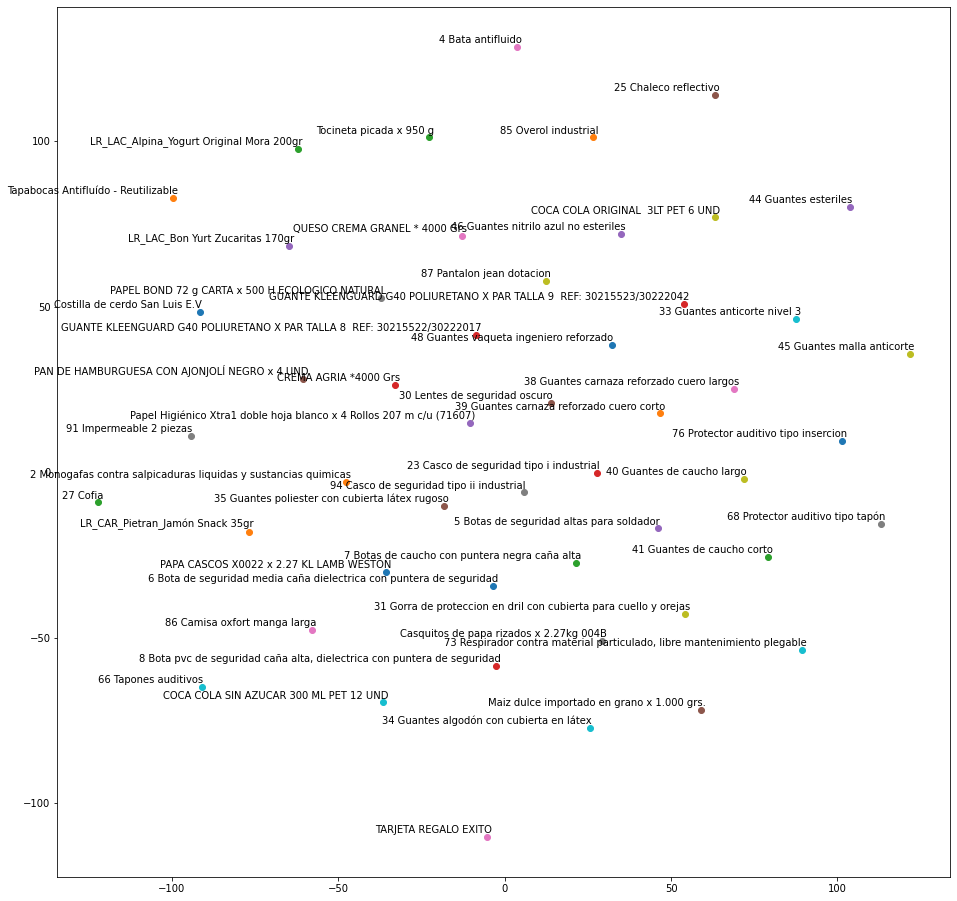

In [109]:
labels=unique_titles
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
plt.show()